# Feature Engineering

## Einleitung
Feature Engineering ist ein essenzieller Bestandteil des maschinellen Lernens, bei dem Rohdaten in ein Format umgewandelt werden, das für Modelle besser geeignet ist. Dabei können Features skaliert, transformiert, kodiert oder sogar neue Features extrahiert werden.

Wir werden die folgenden Techniken behandeln:
- Skalierung und Normalisierung
- Imputation
- Kodierung
- Merkmalsauswahl
- Transformation
- Merkmalsextraktion

## 1. Behandlung von Ausreißern
### 1.1 Identifikation von Ausreißern
Es gibt verschiedene Techniken zur Identifikation von Ausreißern, darunter die Verwendung von Z-Scores und des Interquartilsabstands (IQR). Der Z-Score misst, wie viele Standardabweichungen ein Wert vom Mittelwert entfernt ist. Ein Wert mit einem Z-Score über 3 (oder unter -3) gilt oft als Ausreißer. Der IQR ist der Abstand zwischen dem 1. und 3. Quartil der Verteilung. Werte außerhalb des Bereichs von Q1 - 1.5 * IQR und Q3 + 1.5 * IQR gelten ebenfalls als Ausreißer.
#### 1.1.1 Identifikation von Ausreißern mit Z-Score

In [5]:
import numpy as np
import pandas as pd
from scipy import stats

# Beispiel-Daten
rand_normal = list(np.random.normal(10,4,100))
df = pd.DataFrame({'Feature1': rand_normal + [50]})

# Berechnung des Z-Scores
z_scores = np.abs(stats.zscore(df))
outliers = np.where(z_scores > 3)  # Werte, die mehr als 3 Standardabweichungen entfernt sind
print("Ausreißer-Index:", outliers)

Ausreißer-Index: (array([100]), array([0]))


#### 1.1.2 Identifikation von Ausreißern mit IQR

In [9]:
import numpy as np
import pandas as pd

# Beispiel-Daten
rand_normal = list(np.random.normal(10,4,100))
df = pd.DataFrame({'Feature1': rand_normal + [50]})

# Berechnung des IQR
Q1 = df['Feature1'].quantile(0.25)
Q3 = df['Feature1'].quantile(0.75)
IQR = Q3 - Q1

# Identifikation von Ausreißern
outliers = df[(df['Feature1'] < (Q1 - 1.5 * IQR)) | (df['Feature1'] > (Q3 + 1.5 * IQR))]
print("Ausreißer:\n", outliers)

Ausreißer:
       Feature1
26    0.415967
100  50.000000


### 1.2 Methoden zur Ausreißerbehandlung
Nachdem Ausreißer identifiziert wurden, gibt es mehrere Ansätze, um mit ihnen umzugehen:

- Winsorisierung: Hierbei werden die Ausreißer durch den nächstgelegenen nicht-Ausreißerwert ersetzt (z. B. den 1. oder 99. Perzentilwert).
- Zensurierung: Extreme Werte werden durch den Schwellenwert ersetzt, um sie innerhalb eines akzeptablen Bereichs zu halten.
- Entfernen: In manchen Fällen werden Ausreißer einfach aus den Daten entfernt, insbesondere wenn sie durch Fehler verursacht wurden.
- Transformationen: Eine logarithmische Transformation (siehe 3.3) oder Box-Cox-Transformation kann helfen, die Auswirkungen von Ausreißern zu mildern, indem sie die Skala der Daten verändert.

#### Beispiel: Winsorisierung der Daten

In [13]:
from scipy.stats import mstats

df = pd.DataFrame({'Feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9 ,100, 200, 600000000]})

# Winsorisierung der Daten (5% unten und 5% oben)
df['Feature1'] = mstats.winsorize(df['Feature1'], limits=[0.1, 0.1])

print("Winsorisierte Daten:")
print(df)


Winsorisierte Daten:
    Feature1
0          2
1          2
2          3
3          4
4          5
5          6
6          7
7          8
8          9
9        100
10       200
11       200


## 2. Imputation (Umgang mit fehlenden Werten)

### 2.1 Mittelwert-, Median- und Modus-Imputation
Bei dieser Methode werden fehlende Werte durch den Mittelwert oder Median der jeweiligen Spalte ersetzt. Die Mittelwert-Imputation eignet sich für normalverteilte Daten, während die Median-Imputation bei schiefen Verteilungen robuster ist. Der Modus kann bei kategorischen Daten verwendet werden.

In [14]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Beispiel-Daten
data = {'A': [1, 2, None, 4, 5], 'B': [10, None, 30, 40, 50]}
df = pd.DataFrame(data)

# Mittelwert-Imputation
imputer_mean = SimpleImputer(strategy='mean')
df_mean = pd.DataFrame(imputer_mean.fit_transform(df), columns=df.columns)

# Median-Imputation
imputer_median = SimpleImputer(strategy='median')
df_median = pd.DataFrame(imputer_median.fit_transform(df), columns=df.columns)

print("Mittelwert-Imputation:\n", df_mean)
print("\nMedian-Imputation:\n", df_median)

Mittelwert-Imputation:
      A     B
0  1.0  10.0
1  2.0  32.5
2  3.0  30.0
3  4.0  40.0
4  5.0  50.0

Median-Imputation:
      A     B
0  1.0  10.0
1  2.0  35.0
2  3.0  30.0
3  4.0  40.0
4  5.0  50.0


### 2.2 K-Nearest Neighbor (kNN) Imputation
Hierbei werden fehlende Werte durch die Werte der k-nächsten Nachbarn ersetzt, basierend auf Ähnlichkeiten der vorhandenen Merkmale. Diese Methode kann genauere Schätzungen liefern, ist aber rechenintensiver.

In [15]:
from sklearn.impute import KNNImputer

# Beispiel-Daten
data = {'A': [1, 2, None, 4, 5], 'B': [10, None, 30, 40, 50]}
df = pd.DataFrame(data)

# KNN Imputation
imputer_knn = KNNImputer(n_neighbors=2)
df_knn = pd.DataFrame(imputer_knn.fit_transform(df), columns=df.columns)

print("KNN-Imputation:\n", df_knn)

KNN-Imputation:
      A     B
0  1.0  10.0
1  2.0  25.0
2  2.5  30.0
3  4.0  40.0
4  5.0  50.0


Die beiden nächsten bekannten Nachbarn sind vermutlich:
Zeile 0 (A = 1.0, B = 10)
Zeile 3 (A = 4.0, B = 40)

## 3. Skalierung für nummerische Daten
### 3.1 Min-Max-Skalierung

Die Min-Max-Skalierung transformiert die Daten auf einen Bereich zwischen 0 und 1. Dies wird oft für Algorithmen benötigt, die empfindlich gegenüber Größenordnungen sind.

In [19]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

X = np.array([[100], [200], [300], [400], [500]])
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[0.  ]
 [0.25]
 [0.5 ]
 [0.75]
 [1.  ]]


### 3.2 Standardisierung (Z-Score-Normalisierung)
Standardisierung setzt die Daten auf eine Standardnormalverteilung mit Mittelwert 0 und Standardabweichung 1 um. Dies ist besonders nützlich für Algorithmen, die auf der Annahme einer Normalverteilung basieren.

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
print(X_standardized)

[[-1.41421356]
 [-0.70710678]
 [ 0.        ]
 [ 0.70710678]
 [ 1.41421356]]


### 3.3 Log-Transformation
Verringert die Wirkung von Ausreißern (siehe 1.), indem große Werte durch die logarithmische Umwandlung auf eine kompaktere Skala gebracht werden. Dies verbessert oft die Verteilung der Daten und kann die Modellleistung erhöhen.

In [20]:
import pandas as pd

df = pd.DataFrame({'value': [1, 10, 100, 1000, 10000]})
df['log_value'] = np.log1p(df['value'])
print(df)

   value  log_value
0      1   0.693147
1     10   2.397895
2    100   4.615121
3   1000   6.908755
4  10000   9.210440


## 4. Kodierung/Umwandlung kategorischer Daten

### 4.1 Label-Encoding
Label Encoding ist eine Methode, bei der jeder kategorische Wert in einer Variablen einer numerischen Zahl zugeordnet wird. Diese Zahl wird basierend auf der Reihenfolge der Kategorien im Datensatz oder nach einer bestimmten Sortierung zugewiesen. Bei nominalen Daten hat die Reihenfolge keine Bedeutung, und Label Encoding kann für die Zielvariable verwendet werden. Bei Merkmalen ist es nur dann sinnvoll, wenn es sich um zwei Kategorien handelt, ansonsten sollte One-Hot Encoding verwendet werden.

In [21]:
from sklearn.preprocessing import LabelEncoder

labels = ['rot', 'grün', 'blau', 'grün', 'blau']
df = pd.DataFrame(data={"data": labels})
encoder = LabelEncoder()
df["encoded_data"] = encoder.fit_transform(labels)
print(df)

   data  encoded_data
0   rot             2
1  grün             1
2  blau             0
3  grün             1
4  blau             0


### 4.2 One-Hot-Encoding

One-Hot-Encoding ist eine Methode zur Umwandlung von kategorischen Variablen in eine numerische Form, die von Maschinenlernalgorithmen verarbeitet werden kann. Dabei wird jede Kategorie einer Variablen als neue Spalte (Feature) dargestellt. Jede Spalte enthält entweder den Wert 1 (wenn die Kategorie zutrifft) oder 0 (wenn sie nicht zutrifft). Dadurch wird die Kategorische Variable in eine binäre Repräsentation umgewandelt.

In [22]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

categories = pd.DataFrame({'Farbe': ['rot', 'grün', 'blau', 'grün', 'blau']})

encoder = OneHotEncoder(sparse_output=False, drop='first')  # eine Spalte löschen (redundant)
one_hot_encoded = encoder.fit_transform(categories[['Farbe']])
encoded_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['Farbe'])) # Präfix Farbe für die Spaltennamen

print(encoded_df)

   Farbe_grün  Farbe_rot
0         0.0        1.0
1         1.0        0.0
2         0.0        0.0
3         1.0        0.0
4         0.0        0.0


### 4.3 Ordinal-Encoding
Ordinal Encoding ist eine Technik zur Umwandlung kategorischer Variablen in numerische Werte, bei der den Kategorien eine Reihenfolge zugewiesen wird. Im Gegensatz zum One-Hot-Encoding, das keine Reihenfolge berücksichtigt, wird hier jeder Kategorie ein eindeutiger numerischer Wert basierend auf einer festgelegten Reihenfolge zugewiesen. Diese Methode eignet sich besonders gut für ordinalskalierte Daten, bei denen eine natürliche Reihenfolge zwischen den Kategorien besteht.

In [23]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# Beispiel-Daten
df = pd.DataFrame({'Schwierigkeitsgrad': ['leicht', 'mittel', 'schwer', 'mittel', 'leicht']})


encoder = OrdinalEncoder(categories=[['leicht', 'mittel', 'schwer']])
df["encoded_data"] = encoder.fit_transform(df[['Schwierigkeitsgrad']])

print(df)

  Schwierigkeitsgrad  encoded_data
0             leicht           0.0
1             mittel           1.0
2             schwer           2.0
3             mittel           1.0
4             leicht           0.0


## 5. Merkmalsauswahl (Auswahl der wichtigsten Features)

### 5.1 Korrelationsanalyse
Die Korrelationsanalyse ist eine statistische Methode, um den Zusammenhang zwischen zwei oder mehr Variablen zu untersuchen. Sie hilft dabei, festzustellen, ob und wie stark zwei Variablen miteinander in Beziehung stehen. Eine häufige Maßzahl zur Messung dieses Zusammenhangs ist der Pearson-Korrelationskoeffizient, der Werte zwischen -1 (starke negative Korrelation) und +1 (starke positive Korrelation) annehmen kann. Ein Wert von 0 zeigt keine lineare Beziehung an.
<br><br>
In der Praxis wird die Korrelationsanalyse oft verwendet, um die Beziehung zwischen numerischen Variablen zu untersuchen und herauszufinden, ob eine Variable eine andere beeinflussen könnte. In der Datenanalyse ist die Korrelationsanalyse besonders nützlich, um redundante Variablen zu identifizieren oder zu prüfen, ob eine starke Korrelation zwischen den Variablen besteht, die für Modellierung oder Vorhersagen verwendet werden könnten.
<br><br>
**Arten der Korrelation:**
- Positive Korrelation: Wenn eine Variable steigt, steigt auch die andere.
- Negative Korrelation: Wenn eine Variable steigt, sinkt die andere.
- Keine Korrelation: Wenn keine klare Beziehung zwischen den Variablen besteht.

**Pearson-Korrelationskoeffizient:**<br>
Dieser misst den linearen Zusammenhang zwischen zwei Variablen. Der Wert des Korrelationskoeffizienten reicht von -1 (perfekte negative Korrelation) bis +1 (perfekte positive Korrelation). Ein Wert von 0 bedeutet, dass keine lineare Korrelation existiert.

In [24]:
import pandas as pd
import numpy as np

# Beispiel-Daten
df = pd.DataFrame({
    'Variable1': np.random.normal(10, 2, 100),
    'Variable2': np.random.normal(20, 5, 100),
    'Variable3': np.random.normal(30, 10, 100)
})

correlation_matrix = df.corr()

print("Korrelationsmatrix:")
print(correlation_matrix)

Korrelationsmatrix:
           Variable1  Variable2  Variable3
Variable1   1.000000  -0.027189   0.143806
Variable2  -0.027189   1.000000  -0.008410
Variable3   0.143806  -0.008410   1.000000


- Variable1 und Variable2 haben eine sehr geringe positive Korrelation.
- Variable1 und Variable3 haben eine geringe positive Korrelation.
- Variable2 und Variable3 haben eine sehr geringe negative Korrelation.

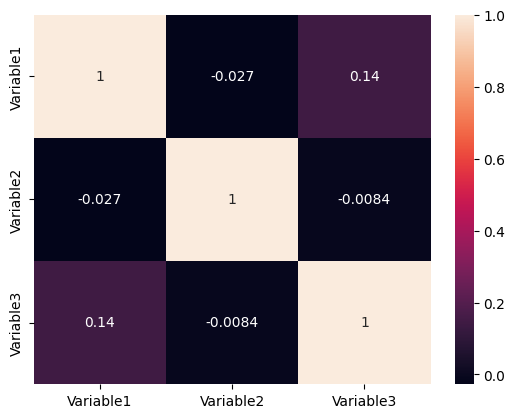

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True)
plt.show()

### 5.2 Rekursive Merkmalseliminierung (RFE)
Rekursive Merkmalseliminierung (RFE) ist eine Methode zur Merkmalsauswahl, bei der iterativ die weniger wichtigen Merkmale aus einem Modell entfernt werden. Zu Beginn wird ein Modell mit allen verfügbaren Merkmalen trainiert, und dann werden die Merkmale, die am wenigsten zur Vorhersageleistung des Modells beitragen, schrittweise entfernt. Dieser Prozess wird wiederholt, bis nur noch die besten Merkmale übrig sind.
<br><br>
RFE wird häufig in Kombination mit Modellen wie Support Vector Machines (SVM) oder Linearen Regressionsmodellen verwendet, um die wichtigeren Merkmale für das Modell zu identifizieren und die Modellkomplexität zu reduzieren.

In [27]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

# Beispiel-Daten
data = load_iris()
X, y = data.data, data.target

# Modell definieren
model = LogisticRegression(max_iter=2000)

# RFE anwenden
selector = RFE(model, n_features_to_select=2)
X_selected = selector.fit_transform(X, y)

# Ausgabe der ausgewählten Merkmale
column_names = data.feature_names 
selected_features = [column_names[i] for i in range(len(column_names)) if selector.support_[i]]
print("Ausgewählte Merkmale:", selected_features)

Ausgewählte Merkmale: ['petal length (cm)', 'petal width (cm)']


## 6. Merkmalsextraktion

Merkmalsextraktion bezieht sich auf die Technik, mit der aus einem großen Datensatz die wichtigsten Merkmale extrahiert werden, um die Komplexität zu reduzieren und gleichzeitig die Leistungsfähigkeit eines Modells zu erhalten. Zwei gängige Methoden sind **PCA** und **t-SNE**.

#### **6.1 PCA (Principal Component Analysis)**

PCA ist eine lineare Methode zur Reduktion der Dimensionalität von Datensätzen. Dabei werden neue, orthogonale Achsen (Hauptkomponenten) gefunden, die die größte Varianz der ursprünglichen Daten erklären. Dies hilft, redundante Merkmale zu eliminieren und die Modellberechnung effizienter zu gestalten.

##### **Vorteile von PCA:**
- Reduziert die Anzahl der Merkmale, behält aber die wichtigsten Informationen bei.
- Verwendet die Varianz in den Daten zur Bestimmung der wichtigsten Komponenten.

In [28]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Beispiel-Daten
df = pd.DataFrame({
    'Feature1': np.random.normal(0, 1, 100),
    'Feature2': np.random.normal(1, 2, 100),
    'Feature3': np.random.normal(2, 3, 100)
})

# Standardisierung der Daten
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# PCA anwenden
pca = PCA(n_components=2)  # Reduziere auf 2 Hauptkomponenten
data_pca = pca.fit_transform(data_scaled)

# Ergebnisse
print(f"Erklärte Varianz der Komponenten: {sum(pca.explained_variance_ratio_):.2f}%")
print("Reduzierte Daten:\n", data_pca[:5])

Erklärte Varianz der Komponenten: 0.71%
Reduzierte Daten:
 [[-0.47391048  0.07119656]
 [ 1.62016613  0.61976181]
 [-0.01301566  1.30575335]
 [ 1.02744501 -1.23351119]
 [-0.31351294 -1.15165261]]


#### **6.2 t-SNE (t-distributed Stochastic Neighbor Embedding)**

t-SNE ist eine nichtlineare Methode, die speziell dafür entwickelt wurde, hochdimensionale Daten in niedrigdimensionale Daten zu transformieren, um deren Struktur zu visualisieren. Es behält die Nachbarschaftsstruktur der Daten bei, indem es die Ähnlichkeit zwischen den Datenpunkten minimiert.

##### **Vorteile von t-SNE:**
- Besonders nützlich für die Visualisierung hochdimensionaler Daten.
- Behält lokale Strukturen der Daten bei und eignet sich daher hervorragend für Clusteranalysen.

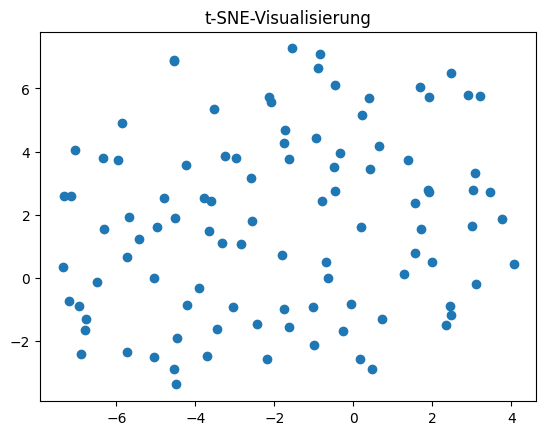

Orginaldaten: (100, 6)
Transformierte Daten: (100, 2)


In [30]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Beispiel-Daten (wie oben)
df = pd.DataFrame({
    'Feature1': np.random.normal(0, 1, 100),
    'Feature2': np.random.normal(1, 2, 100),
    'Feature3': np.random.normal(2, 3, 100),
    'Feature4': np.random.normal(3, 4, 100),
    'Feature5': np.random.normal(4, 5, 100),
    'Feature6': np.random.normal(5, 6, 100)
})

tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(df)

plt.scatter(data_tsne[:, 0], data_tsne[:, 1])
plt.title("t-SNE-Visualisierung")
plt.show()
print(f"Orginaldaten: {df.shape}\nTransformierte Daten: {data_tsne.shape}")

## 7. Feature Transformation

### 7.1 Polynomiale Features erzeugen
Polynomiale Features sind Erweiterungen der bestehenden Merkmale, die durch Erhöhen der Potenzen der Features oder durch Interaktionen zwischen den Features erzeugt werden. Dies kann helfen, nicht-lineare Beziehungen zu modellieren.

- Quadratische Features entstehen durch das Erhöhen der Features auf die zweite Potenz (z. B. $x^2$).
- Kubische Features entstehen durch das Erhöhen der Features auf die dritte Potenz (z. B. $x^3$).
- Interaktionsfeatures entstehen durch das Produkt zweier Variablen (z. B. $x\times y$).

<br>
Polynomiale Features können in vielen Fällen von maschinellen Lernmodellen hilfreich sein, insbesondere wenn es **nicht-lineare Beziehungen** zwischen den Variablen gibt, die durch ein einfaches lineares Modell nicht gut erfasst werden können. Der Einsatz von polynomiellen Features kann die Modellleistung in solchen Situationen verbessern, indem er diese nicht-linearen Zusammenhänge explizit berücksichtigt.

#### Wozu braucht man polynomiale Features?

1. **Nicht-lineare Beziehungen modellieren**:
   - In vielen realen Anwendungen gibt es Beziehungen zwischen Variablen, die nicht einfach durch eine gerade Linie (lineare Regression) beschrieben werden können. Durch die Einführung polynomieller Features (z. B. quadratische oder kubische Terme) können diese nicht-linearen Beziehungen modelliert werden.
   
2. **Verwendung in linearen Modellen**:
   - Ein lineares Modell ist von Natur aus darauf ausgelegt, lineare Beziehungen zu modellieren. Wenn jedoch eine nicht-lineare Beziehung existiert, kann man durch das Hinzufügen polynomieller Features (z. B. $x^2$ oder $x^3$ 
) das Modell so erweitern, dass es auch nicht-lineare Muster erlernt.
   
3. **Verbesserung der Modellkomplexität**:
   - Das Hinzufügen höherer Potenzen eines Features oder Interaktionen zwischen Variablen kann einem Modell helfen, komplexere Muster zu lernen, die mit einfachen linearen Features nicht erfasst werden können.

4. **Erhöhte Vorhersagegenauigkeit**:
   - In vielen Fällen führt die Erweiterung der Merkmale um polynomiale Features zu einer besseren Vorhersagegenauigkeit, da das Modell in der Lage ist, eine Vielzahl von möglichen Beziehungen zwischen den Eingabefunktionen zu lernen.

Polynomiale Features sind besonders nützlich, wenn du mit Daten arbeitest, bei denen die Beziehung zwischen den Variablen nicht einfach linear ist, aber ein lineares Modell trotzdem verwendet werden soll. Sie erweitern die Ausdruckskraft des Modells, ohne dass ein anderes Modell (wie z. B. Entscheidungsbäume) benötigt wird.

**Beispiel:**<br>
Stell dir vor, du hast einen Datensatz, bei dem die Beziehung zwischen der Eingabe $x$ und der Zielvariable $y$ eine quadratische Beziehung darstellt, z. B.:
$$
y = 2 \times x^2 + 3 \times x + 1
$$
Ein lineares Modell würde die Beziehung nicht richtig erfassen, weil es nur lineare Zusammenhänge zwischen $x$ und $y$ modellieren kann. Durch Hinzufügen eines polynomiellen Features $x^2$ kann ein lineares Modell jedoch die quadratische Beziehung besser lernen.

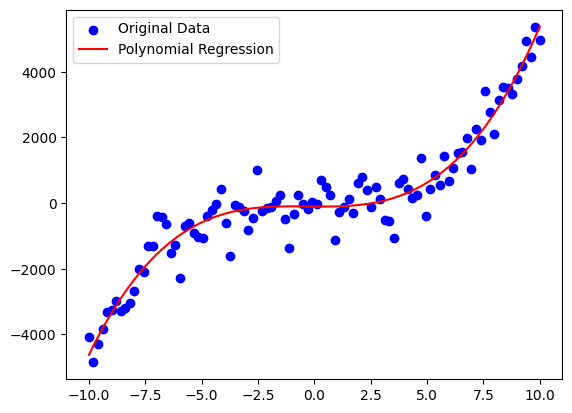

In [44]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

# Beispiel-Daten mit quadratischer Beziehung
x = np.linspace(-10, 10, 100).reshape(-1, 1)
y = 5* (x ** 3) + 2 * (x ** 2) + 3 * x + 1 + np.random.randn(100, 1) * 500  # mit Rauschen

# Polynomiellen Feature-Generator
poly = PolynomialFeatures(degree=3, include_bias=False)  # Grad 2 für quadratische Features
x_poly = poly.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)

y_pred = model.predict(x_poly)

plt.scatter(x, y, color='blue', label='Original Data')
plt.plot(x, y_pred, color='red', label='Polynomial Regression')
plt.legend()
plt.show()

In [41]:
model.coef_, model.intercept_

(array([[3.00417386, 1.9998389 ]]), array([0.83100012]))

#### 1. **Lineare Regression (Grundprinzip)**:
Eine klassische lineare Regression versucht, die beste lineare Beziehung zwischen den Eingabewerten $x$ und der Zielvariablen $y$ zu finden. Sie modelliert diese Beziehung als:

$$
y = \beta_0 + \beta_1 x
$$

Dabei ist $\beta_0$ der Achsenabschnitt und $\beta_1$ die Steigung. Das Modell sucht also nach einer Geraden.

#### 2. **Hinzufügen von polynomiellen Features**:
Wenn wir polynomiellen Features wie $x^2$ hinzufügen, erweitern wir den Raum, in dem das Modell arbeitet. Statt nur $x$ zu betrachten, betrachten wir nun die Features $x$ und $x^2$. Das bedeutet, dass wir das Modell zwingen, **eine lineare Kombination** von $x$ und $x^2$ zu finden:

$$
y = \beta_0 + \beta_1 x + \beta_2 x^2
$$

Jetzt hat das Modell **mehr Freiheitsgrade**, da es **nicht nur eine Gerade**, sondern auch eine Parabel modellieren kann. In diesem erweiterten Raum ist die Beziehung zwischen $x$ und $y$ **linear**, aber in Bezug auf den neuen Feature-Raum $x$ und $x^2$.

#### 3. **Warum kann das Modell eine Kurve machen?**
Durch die Einführung von $x^2$ (und höheren Potenzen von $x$, wenn du mehr polynomiellen Grad hinzufügst) transformieren wir das Problem von einer einfachen linearen Beziehung zu einer **linearen Beziehung im erweiterten Raum**. Das bedeutet:

- Das Modell selbst bleibt "linear", weil es nur eine lineare Kombination von Features ist.
- Aber durch das Hinzufügen von $x^2$, $x^3$, etc., hat das Modell jetzt die Möglichkeit, **nicht-lineare** Beziehungen zu lernen, obwohl es die gleichen linearen Rechenoperationen ausführt.

Das Modell lernt in einem höheren Dimensionsraum, dass es eine quadratische Funktion oder sogar komplexere nicht-lineare Muster benötigt, um die Daten zu beschreiben.

### 7.2 Diskretisierung & Binning
Diskretisierung oder Binning ist der Prozess, bei dem kontinuierliche Werte in diskrete Intervalle oder Kategorien umgewandelt werden. Dies ist besonders hilfreich bei der Modellierung von Entscheidungsbäumen und der Reduzierung von Modellkomplexität.
<br>
Zum Beispiel kann ein Alter von 25 in die Kategorie "20-30" fallen.

In [45]:
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer

# Beispiel-Daten
df = pd.DataFrame({'Feature1': [1, 5, 7, 10, 12, 15, 20]})

# Diskretisierung (Binning) in 3 Kategorien
binning = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
df["binned_data"] = binning.fit_transform(df)

print(df)

   Feature1  binned_data
0         1          0.0
1         5          0.0
2         7          0.0
3        10          1.0
4        12          1.0
5        15          2.0
6        20          2.0


## 8. Feature Extraction – Merkmale aus Daten gewinnen

Feature Extraction ist der Prozess, durch den bedeutungsvolle Informationen aus Rohdaten extrahiert werden. Dies ist besonders nützlich für unstrukturierte Daten wie Text, Bilder oder Zeitstempel, aber auch bei strukturierten Daten (z. B. durch Aggregation oder Zeitdifferenzen).



### 8.1 Textdaten umwandeln
Textdaten in numerische Form umwandeln, um sie in Modellen verwenden zu können.
   - **Beispiele**:
     - **Bag-of-Words**: Erzeugt eine Matrix, in der jeder Text durch eine Sammlung von Wörtern repräsentiert wird.
     - **TF-IDF**: Gewichtet die Begriffe in einem Text basierend darauf, wie häufig sie in einem Dokument und in der Gesamtheit der Dokumente vorkommen.
     - **Word Embeddings (Word2Vec, BERT)**: Vektorbasierte Repräsentation von Wörtern, die semantische Ähnlichkeiten erfassen.

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = ['Dies ist ein Beispieltext.', 'Ein zweiter Text für das Beispiel.']
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(X.toarray())

[[0.         0.53404633 0.         0.53404633 0.37997836 0.
  0.53404633 0.         0.        ]
 [0.4261596  0.         0.4261596  0.         0.30321606 0.4261596
  0.         0.4261596  0.4261596 ]]


### 8.2 Bild-Feature Extraction
Merkmale aus Bildern extrahieren, um sie in Modellen zu verwenden.
   - **Beispiele**:
     - **Schärfe und Kontrast**: Merkmale zur Bildqualität.
     - **Histogram of Oriented Gradients (HOG)**: Eine Methode, die Kantenmerkmale im Bild extrahiert und zur Objekterkennung verwendet wird.

In [47]:
!pip install pillow


[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
import pandas as pd
from PIL import Image, ImageStat

# Bild laden
image = Image.open("Pca.png").convert("L")  # Konvertiere das Bild in Graustufen

# Schärfe berechnen (Standardabweichung der Pixelwerte)
sharpness = np.std(np.array(image))

# Kontrast berechnen (Differenz zwischen max und min Pixelwert)
stat = ImageStat.Stat(image)
contrast = stat.extrema[0][1] - stat.extrema[0][0]

# Die Werte in einem DataFrame speichern
data = {
    'Schärfe': [sharpness],
    'Kontrast': [contrast]
}

df = pd.DataFrame(data)
print(df)

     Schärfe  Kontrast
0  39.490006       255


### 8.3 Zeitstempel-Funktionen und Zeitdifferenzen
Zeitstempel in nützliche Features umwandeln.
   - **Beispiele**:
     - **Tag, Woche, Monat extrahieren**: Aus einem `datetime`-Objekt können Jahr, Monat, Tag, Wochentag extrahiert werden, um Zeitaspekte als Feature zu nutzen.
     - **Zeitdifferenzen**: Differenz zwischen zwei Zeitpunkten, z. B. Zeitspanne zwischen dem ersten und letzten Kauf eines Kunden.


In [49]:
import pandas as pd
df = pd.DataFrame({'timestamp': ['2025-01-01:23:55:33', '2025-02-01:03:12:32', '2025-03-01:12:00:01']})
df['datetime'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d:%H:%M:%S')

# Jahr, Monat, Wochentag extrahieren
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['weekday'] = df['datetime'].dt.weekday

# Zeitdifferenz berechnen
df['diff'] = df['datetime'] - df['datetime'].min()
df['diff_days'] = df['diff'].dt.days
print(df.iloc[:, 2:])

   year  month  weekday             diff  diff_days
0  2025      1        2  0 days 00:00:00          0
1  2025      2        5 30 days 03:16:59         30
2  2025      3        5 58 days 12:04:28         58


### 8.4 Aggregation bei strukturierten Daten
Zusammenfassen von Datenpunkten auf verschiedenen Ebenen, um nützliche Merkmale zu extrahieren.
   - **Beispiel**: Durchschnittliches Einkommen pro Jahr, Summe der Käufe pro Kunde.

In [50]:
import pandas as pd

df = pd.DataFrame({'customer': ['A', 'B', 'A', 'B'],
                     'purchase_amount': [100, 150, 200, 250]})

# Berechne sowohl den Gesamtbetrag als auch den Durchschnitt
aggregated_data = df.groupby('customer')['purchase_amount'].agg(
    total_amount='sum', 
    average_amount='mean'
).reset_index()

print(aggregated_data)

  customer  total_amount  average_amount
0        A           300           150.0
1        B           400           200.0


## 9. Umgang mit unausgewogenen Datensätzen
Der Punkt **Upsampling und Umgang mit unausgewogenen Datensätzen** behandelt die Techniken, die helfen, das Problem der ungleichen Verteilung der Zielklassen in einem Datensatz zu lösen. Dies ist besonders wichtig in Klassifikationsmodellen, da Modelle dazu tendieren, die häufigeren Klassen zu bevorzugen. Verschiedene Methoden, wie **Upsampling**, **Downsampling** und **Class Weighting**, können eingesetzt werden, um eine bessere Performance zu erzielen, wenn die Klassen unausgewogen sind.
### 9.1 Upsampling 
Upsampling ist eine Technik, bei der die weniger häufigen Klassen in einem Datensatz durch das Erhöhen ihrer Häufigkeit künstlich verstärkt werden. Dies geschieht in der Regel durch Duplizieren von Beispielen aus der unterrepräsentierten Klasse oder durch die Generierung neuer synthetischer Datenpunkte.
   - **Techniken**:
     - **Random Upsampling**: Zufällige Wiederholung von Instanzen aus der unterrepräsentierten Klasse.
     - **SMOTE (Synthetic Minority Over-sampling Technique)**: Generierung synthetischer Beispiele, indem neue Datenpunkte basierend auf benachbarten Instanzen in der unterrepräsentierten Klasse erstellt werden.


In [52]:
from sklearn.utils import resample

import pandas as pd
from sklearn.utils import resample

df = pd.DataFrame({
    'feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'feature2': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'target': [0, 0, 0, 0, 0, 1, 0, 0, 1, 0]
})

majority_class = df[df['target'] == 0]
minority_class = df[df['target'] == 1]

minority_upsampled = resample(minority_class, 
                            replace=True,  # Mit Zurücklegen
                            n_samples=len(majority_class),  # Auf gleiche Größe wie majority_class
                            random_state=123)

df_upsampled = pd.concat([majority_class, minority_upsampled])
print(df_upsampled)

   feature1  feature2  target
0         1        10       0
1         2        20       0
2         3        30       0
3         4        40       0
4         5        50       0
6         7        70       0
7         8        80       0
9        10       100       0
5         6        60       1
8         9        90       1
5         6        60       1
5         6        60       1
5         6        60       1
5         6        60       1
5         6        60       1
8         9        90       1


### 9.2 Downsampling
Beim Downsampling wird die Häufigkeit der überrepräsentierten Klasse verringert, indem zufällig Instanzen entfernt werden, um die Verteilung der Klassen auszugleichen.<br>
**Random Downsampling**: Zufällige Auswahl einer Untermenge der überrepräsentierten Klasse, um die Balance zwischen den Klassen zu verbessern.

In [51]:
import pandas as pd
from sklearn.utils import resample

df = pd.DataFrame({
    'feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'feature2': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'target': [0, 0, 0, 0, 0, 1, 0, 0, 1, 0]
})

majority_class = df[df['target'] == 0]
minority_class = df[df['target'] == 1]

majority_downsampled = resample(majority_class, 
                            replace=False,  # Ohne Zurücklegen
                            n_samples=len(minority_class),  # Auf gleiche Größe wie minority_class
                            random_state=123)

df_downsampled = pd.concat([majority_downsampled, minority_class])
print(df_downsampled)

   feature1  feature2  target
0         1        10       0
1         2        20       0
5         6        60       1
8         9        90       1


### 9.3 Class Weighting
Eine alternative Methode zur Handhabung unausgewogener Datensätze ist die Verwendung von **Gewichtungen** in den Modellen. Hierbei werden die Fehler, die auf die unterrepräsentierte Klasse entfallen, stärker gewichtet, sodass das Modell gezwungen wird, diese Klasse stärker zu berücksichtigen.<br>
**Class Weighting in Modellen**: Viele Modelle, wie Entscheidungsbäume und SVMs, bieten die Möglichkeit, die Gewichtung der Klassen anzupassen.

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier(class_weight='balanced')  # Automatische Gewichtung
# model.fit(X_train, y_train)

# X,y fehlen !

**Evaluationstechniken**: Bei unausgewogenen Datensätzen sollte man besonders auf die **Präzision**, **Recall**, **F1-Score** und den **Area Under the Curve (AUC)** achten, da die **Accuracy** bei unausgewogenen Klassen oft nicht aussagekräftig ist.

## 10 Automatisierung per Pipeline
https://towardsdatascience.com/step-by-step-tutorial-of-sci-kit-learn-pipeline-62402d5629b6/

Eine **Pipeline** in `scikit-learn` hilft dabei, alle Schritte, die während der Datenvorverarbeitung und Modellierung erforderlich sind, zusammenzufassen. Eine Pipeline ermöglicht es, verschiedene Verarbeitungsschritte wie Feature-Transformation, Upsampling oder Modelltraining in einer durchgängigen Kette auszuführen, die nach der Trainingsphase direkt auf neue Daten angewendet werden kann. <br><br>

Die wichtigsten Vorteile einer Pipeline sind:
- **Automatisierung:** Du musst die Schritte nicht mehr manuell durchführen – alle Transformationen und Modelltrainings werden in einem einzigen Schritt zusammengefasst.
- **Saubere Trennung:** Die Pipeline trennt klar zwischen verschiedenen Datenverarbeitungs- und Modellierungsphasen.
- **Wiederverwendbarkeit und Konsistenz:** Die Pipeline sorgt dafür, dass dieselben Schritte sowohl während des Trainings als auch während der Modellbewertung auf die Testdaten angewendet werden.
- **Hyperparameter-Optimierung:** In Kombination mit `GridSearchCV` kann man Hyperparameter auf der gesamten Pipeline optimieren, wodurch die Auswahl der besten Modellparameter einfach und effizient wird.

### Beispiel-Pipeline:
In diesem Beispiel erstellen wir eine Pipeline, die zunächst das Upsampling der Minderheitsklasse durchführt, die Daten anschließend skaliert und schließlich ein Modell trainiert. Anschließend verwenden wir `GridSearchCV`, um die besten Hyperparameter für das Modell zu finden.

In [56]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix, classification_report

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

X = df.drop(columns='target')
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Pipeline mit Vorverarbeitung und Feature-Auswahl
pipeline = Pipeline([
    ('scaler', StandardScaler()),                                      # Skalierung der Daten
    ('feature_selection', SelectFromModel(RandomForestClassifier())),  # Feature Selection mit RandomForest
    ('classifier', LogisticRegression())                               # Klassifikator
])

# Definiere den Parameterraum für GridSearch
param_grid = {
    'classifier__C': [.01, .1, 1, 10, 100],
    'classifier__solver': ['lbfgs', 'liblinear', 'newton-cg']    
}

# GridSearchCV-Instanz mit Pipeline
grid_search = GridSearchCV(pipeline, param_grid, cv=3)
grid_search.fit(X_train, y_train)


print("Beste Hyperparameter:", grid_search.best_params_)

y_pred = grid_search.best_estimator_.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Beste Hyperparameter: {'classifier__C': 0.1, 'classifier__solver': 'lbfgs'}

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

